In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import optuna
from time import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import joblib

# All the Models I'll be using
from sklearn.tree import DecisionTreeRegressor
import catboost as cb
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Get the Data

In [2]:
# Import as variable
df = pd.read_csv('./dataset/movie_statistic_dataset.csv')
display(df)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,9/12/22,"Action,Adventure,Fantasy",192,James Cameron,"writer,producer,director",1954,alive,7.8,277543,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,23/4/19,"Action,Adventure,Drama",181,-,-,-,-,8.4,1143642,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,20/5/11,"Action,Adventure,Fantasy",137,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,22/4/15,"Action,Adventure,Sci-Fi",141,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,25/4/18,"Action,Adventure,Sci-Fi",149,-,-,-,-,8.4,1091968,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,7/5/04,Documentary,100,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,9/8/95,"Comedy,Drama,Romance",98,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986,4.231464,50000,10426506,10426506
4377,Gabriela,16/3/01,"Drama,Romance",93,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593,2.526405,50000,2335352,2335352
4378,Tiny Furniture,12/11/10,"Comedy,Drama,Romance",98,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595,4.242085,50000,391674,424149


In [3]:
# Extract two random rows for deployment testing
extract = df.sample(n=2, random_state=1)
display(extract)
for i in extract.index:
    df.drop(index=i, inplace=True)
display(df)

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
3044,Rachel Getting Married,3/10/08,"Drama,Romance",113,Jonathan Demme,"director,producer,writer",1944,2017,6.7,49863,5.200462,12000000,12796861,17475475
2359,Doubt,12/12/08,"Drama,Mystery",104,John Patrick Shanley,"writer,director,soundtrack",1950,alive,7.5,131258,6.371246,20000000,33446470,53191101


,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,9/12/22,"Action,Adventure,Fantasy",192,James Cameron,"writer,producer,director",1954,alive,7.8,277543,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,23/4/19,"Action,Adventure,Drama",181,-,-,-,-,8.4,1143642,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,20/5/11,"Action,Adventure,Fantasy",137,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,22/4/15,"Action,Adventure,Sci-Fi",141,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,25/4/18,"Action,Adventure,Sci-Fi",149,-,-,-,-,8.4,1091968,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,Super Size Me,7/5/04,Documentary,100,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078,6.017902,65000,11529368,22233808
4376,The Brothers McMullen,9/8/95,"Comedy,Drama,Romance",98,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986,4.231464,50000,10426506,10426506
4377,Gabriela,16/3/01,"Drama,Romance",93,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593,2.526405,50000,2335352,2335352
4378,Tiny Furniture,12/11/10,"Comedy,Drama,Romance",98,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595,4.242085,50000,391674,424149


In [4]:
# Reset the index of the dataset
df = df.reset_index()
display(df)

,index,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,0,Avatar: The Way of Water,9/12/22,"Action,Adventure,Fantasy",192,James Cameron,"writer,producer,director",1954,alive,7.8,277543,7.061101,460000000,667830256,2265935552
1,1,Avengers: Endgame,23/4/19,"Action,Adventure,Drama",181,-,-,-,-,8.4,1143642,8.489533,400000000,858373000,2794731755
2,2,Pirates of the Caribbean: On Stranger Tides,20/5/11,"Action,Adventure,Fantasy",137,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763,6.272064,379000000,241071802,1045713802
3,3,Avengers: Age of Ultron,22/4/15,"Action,Adventure,Sci-Fi",141,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573,7.214013,365000000,459005868,1395316979
4,4,Avengers: Infinity War,25/4/18,"Action,Adventure,Sci-Fi",149,-,-,-,-,8.4,1091968,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,4375,Super Size Me,7/5/04,Documentary,100,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078,6.017902,65000,11529368,22233808
4374,4376,The Brothers McMullen,9/8/95,"Comedy,Drama,Romance",98,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986,4.231464,50000,10426506,10426506
4375,4377,Gabriela,16/3/01,"Drama,Romance",93,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593,2.526405,50000,2335352,2335352
4376,4378,Tiny Furniture,12/11/10,"Comedy,Drama,Romance",98,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595,4.242085,50000,391674,424149


In [5]:
# View Feature Headers
print(list(df.columns))

['index', 'movie_title', 'production_date', 'genres', 'runtime_minutes', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']


In [6]:
# Modify Feature Headers
renamed_columns = {
    'director_birthYear' : 'director_birth', 
    'director_deathYear': 'director_death', 
    'movie_averageRating': 'rating', 
    'movie_numerOfVotes': 'votes', 
    'approval_Index': 'approval_index', 
    'Production budget $': 'budget', 
    'Domestic gross $': 'domestic_gross', 
    'Worldwide gross $': 'worldwide_gross' 
}
df.rename(renamed_columns, axis='columns', inplace=True)
display(df)

,index,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birth,director_death,rating,votes,approval_index,budget,domestic_gross,worldwide_gross
0,0,Avatar: The Way of Water,9/12/22,"Action,Adventure,Fantasy",192,James Cameron,"writer,producer,director",1954,alive,7.8,277543,7.061101,460000000,667830256,2265935552
1,1,Avengers: Endgame,23/4/19,"Action,Adventure,Drama",181,-,-,-,-,8.4,1143642,8.489533,400000000,858373000,2794731755
2,2,Pirates of the Caribbean: On Stranger Tides,20/5/11,"Action,Adventure,Fantasy",137,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763,6.272064,379000000,241071802,1045713802
3,3,Avengers: Age of Ultron,22/4/15,"Action,Adventure,Sci-Fi",141,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573,7.214013,365000000,459005868,1395316979
4,4,Avengers: Infinity War,25/4/18,"Action,Adventure,Sci-Fi",149,-,-,-,-,8.4,1091968,8.460958,300000000,678815482,2048359754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,4375,Super Size Me,7/5/04,Documentary,100,Morgan Spurlock,"producer,writer,director",1970,alive,7.2,110078,6.017902,65000,11529368,22233808
4374,4376,The Brothers McMullen,9/8/95,"Comedy,Drama,Romance",98,Edward Burns,"actor,writer,producer",1968,alive,6.6,7986,4.231464,50000,10426506,10426506
4375,4377,Gabriela,16/3/01,"Drama,Romance",93,Vincent Jay Miller,"producer,director,writer",1973,alive,4.9,1593,2.526405,50000,2335352,2335352
4376,4378,Tiny Furniture,12/11/10,"Comedy,Drama,Romance",98,Lena Dunham,"writer,actress,producer",1986,alive,6.2,14595,4.242085,50000,391674,424149


# 2. Visualise the Data

## 2.1 Data Discovery and Profiling

In [ ]:
# Displays
display(df.head(5))
display(df.tail(5))
display(df.sample(5))

In [ ]:
# Dimensions
print(df.shape)

In [ ]:
# Datatypes
print(df.dtypes)

In [ ]:
# Structural Information
print(df.info())

In [ ]:
# NaN or Null Checks
print(df.isnull().sum())

In [ ]:
# Infinite Value Checks
print(np.isinf(df.select_dtypes(include=[np.number])).sum()) 

In [ ]:
# Checking for 'Missing Values' such as '-' or '/N'

# Checking production_date 
display(df[df['production_date'].str.fullmatch('-')])
display(df[df['production_date'].str.contains('N')].sum())

# Checking genres 
display(df[df['genres'].astype(str).str.fullmatch('-', na=False)].sum())

# Checking director_name
display(df[df['director_name'].str.fullmatch('-')]) # 326 rows, 7.4% of rows

# Checking rating
display(df[df['rating'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['rating'].astype(str).str.contains('N')].sum())

# Checking votes
display(df[df['votes'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['votes'].astype(str).str.contains('N')].sum())

# Checking approval_index
display(df[df['approval_index'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['approval_index'].astype(str).str.contains('N')].sum())

# Checking budget
display(df[df['budget'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['budget'].astype(str).str.contains('N')].sum())

# Checking domestic_gross
display(df[df['domestic_gross'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['domestic_gross'].astype(str).str.contains('N')].sum())

# Checking worldwide_gross
display(df[df['worldwide_gross'].astype(str).str.fullmatch('-', na=False)].sum())
display(df[df['worldwide_gross'].astype(str).str.contains('N')].sum())

In [ ]:
# Nominal Aggregation
print(df.groupby('genres').size())
print(df.groupby('director_name').size())

In [ ]:
# Numeric Aggregation
print(df.groupby('votes').size()) # Displays the HUGE range of votes
print(df.groupby('budget').size()) # Likewise
print(df.groupby('domestic_gross').size()) # This one is interesting, which 3 movies had the SAME least dom_gross
print(df.groupby('worldwide_gross').size()) # Likewise

In [ ]:
# Inconsistencies
print(df['rating'].unique())

In [ ]:
# Checking Duplicates
print(df[df.duplicated()])

In [ ]:
# Distinct Values
print(df.nunique())

In [ ]:
# Statistical Summary
print(df.describe())

In [ ]:
# Modified View for Statistical Summary
pd.options.display.float_format = '{:.2f}'.format
print(df.describe())

In [ ]:
# Correlation Matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
display(numeric_columns.corr())

In [ ]:
# Interesting Observations

# 1 - Checking the odd 3 movies that happen to have the exact same lowest revenue value
df_sorted = df.sort_values(by='domestic_gross', ascending=True)
display(df_sorted.head(3))

# 2 - Reviewing all the movies with the same title
df_duplicates = df[df.duplicated(subset=['movie_title'], keep=False)].sort_values(by='movie_title')
display(df_duplicates)

# 3 - Movie with the longest runtime
df_sorted = df.sort_values(by='runtime_minutes', ascending=False)
top = pd.DataFrame(df_sorted.head(1))
display(top)

# 4 - Movie with the highest budget
display(df[df['budget'] == df['budget'].max()])

# 5 - Movie with the highest worldwide gross
display(df[df['worldwide_gross'] == df['worldwide_gross'].max()])

## 2.2 Exploratory Data Analysis

In [ ]:
# Individual Frequency - Top 10 Genres
genres_separate = df['genres'].str.split(',').explode()
top_10_genres = genres_separate.value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_genres.index,  
    y=top_10_genres.values,  
    palette='dark:lightcoral',
    hue=top_10_genres.index
)
plt.title('Top 10 Genres by Frequency', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Top 10 Directors
top_10_directors_by_frequency = df['director_name'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_directors_by_frequency.index,  
    y=top_10_directors_by_frequency.values,  
    palette='dark:lightcoral',
    hue=top_10_directors_by_frequency.index
)
plt.title('Top 10 Directors by Frequency', fontsize=14)
plt.xlabel('Director')
plt.ylabel('Number of Movies Directed')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Years
df['date'] = pd.to_datetime(df['production_date'], errors='coerce')  
df['year'] = df['date'].dt.year  
plt.figure(figsize=(10, 6))
sns.histplot(
    df['year'], 
    bins=range(df['year'].min(), df['year'].max() + 1), 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
plt.title('Histogram Distribution of Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Undo Dataframe Manipulation
del df['date']
del df['year']

In [ ]:
# Individual Frequency - Months
df['date'] = pd.to_datetime(df['production_date'], errors='coerce')  
df['month'] = df['date'].dt.month  
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df['month'], 
    bins=range(df['month'].min(), df['month'].max() + 1), 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        plt.text(
            patch.get_x() + patch.get_width() / 2,  
            height,  # Bar height
            f'{int(height)}',  
            ha='center', 
            va='bottom', 
            fontsize=8
        )
plt.title('Histogram Distribution of Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Undo Dataframe Manipulation
del df['date']
del df['month']

In [ ]:
# Individual Frequency - Days
df['date'] = pd.to_datetime(df['production_date'], errors='coerce')  
df['day'] = df['date'].dt.day  
plt.figure(figsize=(10, 6))
sns.histplot(
    df['day'], 
    bins=range(df['day'].min(), df['day'].max() + 1), 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
plt.title('Histogram Distribution of Days', fontsize=14)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Undo Dataframe Manipulation
del df['date']
del df['day']

In [ ]:
# Individual Frequency - Runtime Minutes
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df['runtime_minutes'], 
    bins=range(int(df['runtime_minutes'].min()), int(df['runtime_minutes'].max()) + 1), 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        plt.text(
            patch.get_x() + patch.get_width() / 2,  
            height,  # Bar height
            f'{int(height)}',  
            ha='center', 
            va='bottom', 
            fontsize=8
        )
plt.title('Histogram Distribution of Runtime Minutes', fontsize=14)
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Ratings
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df['rating'], 
    bins=range(int(df['rating'].min()), int(df['rating'].max()) + 1), 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
plt.title('Histogram Distribution of Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Votes
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df['votes'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        plt.text(
            patch.get_x() + patch.get_width() / 2,  
            height,  # Bar height
            f'{int(height)}',  
            ha='center', 
            va='bottom', 
            fontsize=8
        )
plt.title('Histogram Distribution of Votes', fontsize=14)
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Approval Index
plt.figure(figsize=(10, 6))
sns.histplot(
    df['approval_index'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
plt.title('Histogram Distribution of Approval Index', fontsize=14)
plt.xlabel('Approval Index')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Budget
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    df['budget'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='lightcoral', 
    kde=True
)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  
        plt.text(
            patch.get_x() + patch.get_width() / 2,  
            height,  # Bar height
            f'{int(height)}',  
            ha='center', 
            va='bottom', 
            fontsize=8
        )
plt.title('Histogram Distribution of Budget', fontsize=14)
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Domestic Gross $
plt.figure(figsize=(10, 6))
sns.histplot(
    df['domestic_gross'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='lightcoral', 
    log_scale=True,
    kde=True
)
plt.title('Histogram Distribution of Domestic Gross Revenue $', fontsize=14)
plt.xlabel('Domestic Gross $ (log scale)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Individual Frequency - Worldwide Gross $ 
plt.figure(figsize=(10, 6))
sns.histplot(
    df['domestic_gross'], 
    bins=50, 
    color='lightcoral', 
    edgecolor='lightcoral', 
    log_scale=True, 
    kde=True
)
plt.title('Histogram Distribution of Worldwide Gross Revenue $')
plt.xlabel('Worldwide Gross $ (log scale)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Comparison Against Worldwide Gross - Top 10 Movies
top_10_movies = df.nlargest(10, 'worldwide_gross')
plt.figure(figsize=(10, 6))
sns.barplot(
    x='movie_title',  
    y='worldwide_gross',  
    data=top_10_movies,  
    palette='dark:lightcoral',
    hue='movie_title'
)
plt.title('Top 10 Movies by Worldwide Gross', fontsize=14)
plt.xlabel('Movie Title')
plt.ylabel('Worldwide Gross (in billions)') # not sure if its actually in billiond
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 18% have the exact same values !!
same_gross_df = df[df['domestic_gross'] == df['worldwide_gross']]
display(same_gross_df)

In [ ]:
# Comparison Against Worldwide Gross - Top 10 Genres
genres_exploded = df['genres'].str.split(',').explode()
genres_exploded_with_gross = df.loc[genres_exploded.index, ['worldwide_gross']].copy()
top_10_genres_by_gross = genres_exploded_with_gross.groupby(genres_exploded).sum().nlargest(10, 'worldwide_gross')
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_genres_by_gross.index,  
    y=top_10_genres_by_gross['worldwide_gross'],  
    palette='dark:lightcoral',
    hue=top_10_genres_by_gross.index
)
plt.title('Top 10 Genres by Worldwide Gross', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Gross (in billions)')  # assuming it's in billions
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Comparison Against Worldwide Gross - Top 10 Directors
top_10_directors = df.groupby('director_name')['worldwide_gross'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_directors.index,  
    y=top_10_directors.values,  
    palette='dark:lightcoral',
    hue=top_10_directors.index
)
plt.title('Top 10 Directors by Worldwide Gross', fontsize=14)
plt.xlabel('Director')
plt.ylabel('Total Worldwide Gross (in billions)')  
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Relationships - Distribution of Domestic Gross in Worldwide Gross
df['percentage'] = (df['domestic_gross'] / df['worldwide_gross']) * 100
percentage_df = df[['percentage']]
del df['percentage']
plt.figure(figsize=(8, 6))
sns.histplot(percentage_df['percentage'], bins=10, kde=True, color='lightcoral', edgecolor='lightcoral')
plt.xlabel('Domestic Gross Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Domestic Gross in Worldwide Gross')
plt.show()

In [ ]:
# Relationships - Heatmap
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="pink",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title('Heatmap of Numeric Features', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Relationships - Scatter / PairPlot Matrix
numeric_features = [
    'runtime_minutes', 
    'rating', 
    'votes', 
    'approval_index', 
    'budget', 
    'domestic_gross', 
    'worldwide_gross'
]
sns.pairplot(df[numeric_features], plot_kws={'color': 'lightcoral'})
plt.suptitle('Scatter/PairPlot Matrix of Numeric Features', y=1.02, fontsize=14)
plt.show()

## 2.3 Data Cleaning

In [7]:
# Removing Unnecessary Columns
del df['movie_title']

In [8]:
# Removing Columns with Unclean values ?? '-'
del df['director_name']
del df['director_professions']
del df['director_birth']
del df['director_death']

In [9]:
# Splitting production_date into 3 separate columns, only using year
df['production_date'] = pd.to_datetime(df['production_date'])
df['year'] = df['production_date'].dt.year
del df ['production_date']

/var/folders/mh/634dwgpd121d9dtz1mhdcslh0000gn/T/ipykernel_58267/3866449672.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['production_date'] = pd.to_datetime(df['production_date'])


In [10]:
# Removing Redundant Columns
del df['votes']
del df['rating']

In [11]:
# Prevent Potential Data Leakage
del df['domestic_gross']

In [12]:
del df['index'] # TODO - move this up there
display(df)

,genres,runtime_minutes,approval_index,budget,worldwide_gross,year
0,"Action,Adventure,Fantasy",192,7.061101,460000000,2265935552,2022
1,"Action,Adventure,Drama",181,8.489533,400000000,2794731755,2019
2,"Action,Adventure,Fantasy",137,6.272064,379000000,1045713802,2011
3,"Action,Adventure,Sci-Fi",141,7.214013,365000000,1395316979,2015
4,"Action,Adventure,Sci-Fi",149,8.460958,300000000,2048359754,2018
...,...,...,...,...,...,...
4373,Documentary,100,6.017902,65000,22233808,2004
4374,"Comedy,Drama,Romance",98,4.231464,50000,10426506,1995
4375,"Drama,Romance",93,2.526405,50000,2335352,2001
4376,"Comedy,Drama,Romance",98,4.242085,50000,424149,2010


## 2.4 Data Pre-Processing

In [13]:
# Binning Runtime Minutes
# bin_edges = [90, 150, 210, float('inf')]
# bin_labels = ['Short', 'Medium', 'Long']  
# df['runtime_category'] = pd.cut(df['runtime_minutes'], bins=bin_edges, labels=bin_labels)
bin_edges = [0, 90, 150, 210, float('inf')]
bin_labels = ['Short', 'Medium', 'Long', 'VeryLong']  
df['runtime_category'] = pd.cut(df['runtime_minutes'], bins=bin_edges, labels=bin_labels)

## 2.5 Feature Engineering

In [14]:
# One-Hot Encoding Runtime Minutes
# df_cat = pd.get_dummies(df, columns=['runtime_category'], drop_first=True)
# df_cat = df_cat.astype({ 'runtime_category_Medium': 'int','runtime_category_Long': 'int'})
# del df_cat['runtime_minutes']
# print(df_cat)
# df = df_cat
# display(df)
df_cat = pd.get_dummies(df, columns=['runtime_category'], drop_first=True)
df_cat = df_cat.astype({ 'runtime_category_Medium': 'int','runtime_category_Long': 'int', 'runtime_category_VeryLong': 'int'})
del df_cat['runtime_minutes']
print(df_cat)
df = df_cat
display(df)

                        genres  approval_index     budget  worldwide_gross  \
0     Action,Adventure,Fantasy        7.061101  460000000       2265935552   
1       Action,Adventure,Drama        8.489533  400000000       2794731755   
2     Action,Adventure,Fantasy        6.272064  379000000       1045713802   
3      Action,Adventure,Sci-Fi        7.214013  365000000       1395316979   
4      Action,Adventure,Sci-Fi        8.460958  300000000       2048359754   
...                        ...             ...        ...              ...   
4373               Documentary        6.017902      65000         22233808   
4374      Comedy,Drama,Romance        4.231464      50000         10426506   
4375             Drama,Romance        2.526405      50000          2335352   
4376      Comedy,Drama,Romance        4.242085      50000           424149   
4377               Documentary        2.191765      50000             8374   

      year  runtime_category_Medium  runtime_category_Long  \
0

,genres,approval_index,budget,worldwide_gross,year,runtime_category_Medium,runtime_category_Long,runtime_category_VeryLong
0,"Action,Adventure,Fantasy",7.061101,460000000,2265935552,2022,0,1,0
1,"Action,Adventure,Drama",8.489533,400000000,2794731755,2019,0,1,0
2,"Action,Adventure,Fantasy",6.272064,379000000,1045713802,2011,1,0,0
3,"Action,Adventure,Sci-Fi",7.214013,365000000,1395316979,2015,1,0,0
4,"Action,Adventure,Sci-Fi",8.460958,300000000,2048359754,2018,1,0,0
...,...,...,...,...,...,...,...,...
4373,Documentary,6.017902,65000,22233808,2004,1,0,0
4374,"Comedy,Drama,Romance",4.231464,50000,10426506,1995,1,0,0
4375,"Drama,Romance",2.526405,50000,2335352,2001,1,0,0
4376,"Comedy,Drama,Romance",4.242085,50000,424149,2010,1,0,0


## 3-4. Shuffle and Split the Data

In [15]:
# Extract y variable
y = df['worldwide_gross'].values
del df['worldwide_gross']

In [16]:
# Extract X variable
X = df.values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [18]:
# Convert back to Original Feature Headers
renamed_columns = {
    0:'genres', 
    1:'approval_index',
    2:'budget',
    3:'year', 
    4:'runtime_category_Medium', 
    5:'runtime_category_Long', 
    6:'runtime_category_VeryLong'
}
X_train.rename(renamed_columns, axis='columns', inplace=True)
X_test.rename(renamed_columns, axis='columns', inplace=True)

In [19]:
display(X_train)

,genres,approval_index,budget,year,runtime_category_Medium,runtime_category_Long,runtime_category_VeryLong
0,"Comedy,Horror,Mystery",5.645,5000000,2017,1,0,0
1,"Adventure,Comedy,Fantasy",3.702363,35000000,2001,1,0,0
2,"Action,Adventure,Mystery",5.36987,38000000,1994,1,0,0
3,"Crime,Drama",4.020136,13500000,1982,1,0,0
4,"Comedy,Drama,Fantasy",5.860885,82500000,2006,1,0,0
...,...,...,...,...,...,...,...
3059,Drama,3.072574,300000,2000,1,0,0
3060,"Comedy,Drama",4.809701,18000000,2002,0,0,0
3061,"Adventure,Animation,Comedy",5.077615,80000000,2019,0,0,0
3062,"Adventure,Crime,Thriller",5.017779,45000000,1994,1,0,0


### Feature Engineering - TRAIN SET

In [20]:
# Robust Scaling Budget
robust_scaler = RobustScaler()
X_train[['budget_scaled']] = robust_scaler.fit_transform(X_train[['budget']])
X_train.drop(columns=['budget'], inplace=True)

In [21]:
# Standard Scaling Year
s_scaler = StandardScaler()
X_train[['year_scaled']] = s_scaler.fit_transform(X_train[['year']])
X_train.drop(columns=['year'], inplace=True)

In [22]:
# One-Hot Encoding Genre - TRAIN
new = X_train['genres'].str.get_dummies(sep=',')
display(new)
del X_train['genres']

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3060,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3061,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3062,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


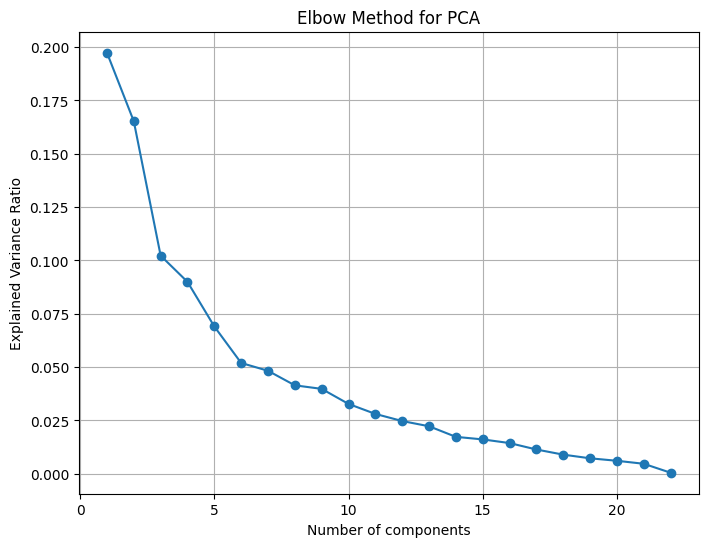

In [23]:
# Principle Component Analysis (PCA) for Categorical Data
def explained_variance(data, max_components=22):
    pca = PCA(n_components=max_components)
    pca.fit(data)
    return pca.explained_variance_ratio_
    
explained_variance_ratio = explained_variance(new)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) +1), explained_variance_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

In [24]:
pca = PCA(n_components=5)
pca.fit(new)
new_data = pd.DataFrame(pca.transform(new), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
display(new_data)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3

,pc1,pc2,pc3,pc4,pc5
0,-0.158480,0.536234,-0.890407,-0.561227,-0.287751
1,-0.617737,0.872657,0.234382,-0.220999,-0.410245
2,-1.004702,-0.375546,0.341949,-0.198981,-0.046075
3,0.560435,-0.502265,-0.101141,0.542231,-0.363603
4,0.478523,0.522511,0.100207,0.048457,-0.253825
...,...,...,...,...,...
3059,0.552257,-0.289655,0.227580,-0.138480,-0.148946
3060,0.546794,0.493930,0.052684,0.167339,-0.198338
3061,-0.641320,0.948967,0.282342,-0.143163,-0.522228
3062,-0.628857,-0.430480,-0.384928,0.131867,-0.416617


In [25]:
X_train = pd.DataFrame(X_train).join(new_data)
display(X_train)

,approval_index,runtime_category_Medium,runtime_category_Long,runtime_category_VeryLong,budget_scaled,year_scaled,pc1,pc2,pc3,pc4,pc5
0,5.645,1,0,0,-0.4500,0.666417,-0.158480,0.536234,-0.890407,-0.561227,-0.287751
1,3.702363,1,0,0,0.3000,-0.467225,-0.617737,0.872657,0.234382,-0.220999,-0.410245
2,5.36987,1,0,0,0.3750,-0.963194,-1.004702,-0.375546,0.341949,-0.198981,-0.046075
3,4.020136,1,0,0,-0.2375,-1.813425,0.560435,-0.502265,-0.101141,0.542231,-0.363603
4,5.860885,1,0,0,1.4875,-0.112962,0.478523,0.522511,0.100207,0.048457,-0.253825
...,...,...,...,...,...,...,...,...,...,...,...
3059,3.072574,1,0,0,-0.5675,-0.538078,0.552257,-0.289655,0.227580,-0.138480,-0.148946
3060,4.809701,0,0,0,-0.1250,-0.396372,0.546794,0.493930,0.052684,0.167339,-0.198338
3061,5.077615,0,0,0,1.4250,0.808123,-0.641320,0.948967,0.282342,-0.143163,-0.522228
3062,5.017779,1,0,0,0.5500,-0.963194,-0.628857,-0.430480,-0.384928,0.131867,-0.416617


### Feature Engineering - TEST SET

In [26]:
# Robust Scaling Budget
robust_scaler = RobustScaler()
X_test[['budget_scaled']] = robust_scaler.fit_transform(X_test[['budget']])
X_test.drop(columns=['budget'], inplace=True)

In [27]:
# Standard Scaling Year
s_scaler = StandardScaler()
X_test[['year_scaled']] = s_scaler.fit_transform(X_test[['year']])
X_test.drop(columns=['year'], inplace=True)

In [28]:
# One-Hot Encoding Genre - TEST
new2 = X_test['genres'].str.get_dummies(sep=',')
display(new2)
del X_test['genres']

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,\N
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1310,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1311,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1312,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


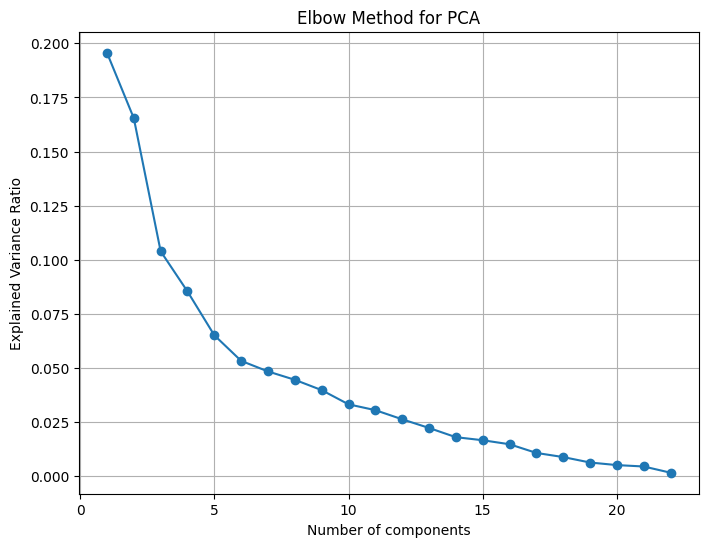

In [29]:
# Principle Component Analysis (PCA) for Categorical Data
def explained_variance(data, max_components=22):
    pca = PCA(n_components=max_components)
    pca.fit(data)
    return pca.explained_variance_ratio_
    
explained_variance_ratio = explained_variance(new2)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained_variance_ratio) +1), explained_variance_ratio, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Method for PCA')
plt.grid(True)
plt.show()

In [30]:
pca = PCA(n_components=5)
pca.fit(new2)
new_data2 = pd.DataFrame(pca.transform(new2), columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])
display(new_data2)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Library/Frameworks/Python.framework/Versions/3

,pc1,pc2,pc3,pc4,pc5
0,0.769915,-0.201367,0.316335,-0.168388,-0.340518
1,-0.176965,-0.514403,-1.027932,-0.499407,0.024063
2,0.196340,-0.556587,0.535921,0.176597,0.314488
3,0.621000,-0.199894,0.284314,-0.286861,-0.119489
4,-0.547397,-0.747745,-0.279319,-0.142461,0.475058
...,...,...,...,...,...
1309,-0.312048,0.686268,-0.324466,0.070615,-0.084081
1310,0.689243,-0.197641,0.265277,-0.178078,-0.176963
1311,0.566524,0.886453,0.154169,-0.006760,0.554505
1312,-0.684393,0.173231,-0.104975,1.175900,0.130823


In [31]:
X_test = pd.DataFrame(X_test).join(new_data2)
display(X_test)

,approval_index,runtime_category_Medium,runtime_category_Long,runtime_category_VeryLong,budget_scaled,year_scaled,pc1,pc2,pc3,pc4,pc5
0,6.308834,1,0,0,0.650,0.944055,0.769915,-0.201367,0.316335,-0.168388,-0.340518
1,5.397731,1,0,0,-0.225,0.378590,-0.176965,-0.514403,-1.027932,-0.499407,0.024063
2,5.628155,1,0,0,2.150,0.449273,0.196340,-0.556587,0.535921,0.176597,0.314488
3,6.110844,1,0,0,0.525,-0.045508,0.621000,-0.199894,0.284314,-0.286861,-0.119489
4,6.769528,1,0,0,2.025,-0.257557,-0.547397,-0.747745,-0.279319,-0.142461,0.475058
...,...,...,...,...,...,...,...,...,...,...,...
1309,2.529801,1,0,0,1.650,0.661322,-0.312048,0.686268,-0.324466,0.070615,-0.084081
1310,2.9261,1,0,0,-0.350,0.378590,0.689243,-0.197641,0.265277,-0.178078,-0.176963
1311,4.935139,1,0,0,0.000,-0.540290,0.566524,0.886453,0.154169,-0.006760,0.554505
1312,3.46655,0,0,0,0.000,-0.469607,-0.684393,0.173231,-0.104975,1.175900,0.130823


### Extra Considerations

In [33]:
# Fix Data Types
X_train['approval_index'] = pd.to_numeric(X_train['approval_index'], errors='coerce')  
X_train['budget_scaled'] = pd.to_numeric(X_train['budget_scaled'], errors='coerce')
X_train['year_scaled'] = pd.to_numeric(X_train['year_scaled'], errors='coerce')
X_train['runtime_category_Medium'] = pd.to_numeric(X_train['runtime_category_Medium'], errors='coerce')
X_train['runtime_category_Long'] = pd.to_numeric(X_train['runtime_category_Long'], errors='coerce')
X_train['runtime_category_VeryLong'] = pd.to_numeric(X_train['runtime_category_VeryLong'], errors='coerce')

In [34]:
# Fix Data Types
X_test['approval_index'] = pd.to_numeric(X_test['approval_index'], errors='coerce') 
X_test['budget_scaled'] = pd.to_numeric(X_test['budget_scaled'], errors='coerce')
X_test['year_scaled'] = pd.to_numeric(X_test['year_scaled'], errors='coerce')
X_test['runtime_category_Medium'] = pd.to_numeric(X_test['runtime_category_Medium'], errors='coerce')
X_test['runtime_category_Long'] = pd.to_numeric(X_test['runtime_category_Long'], errors='coerce')
X_test['runtime_category_VeryLong'] = pd.to_numeric(X_test['runtime_category_VeryLong'], errors='coerce')

In [35]:
# Variance Inflation Factor (VIF)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data
    
vif_df = calculate_vif(pd.DataFrame(X_train))
vif_df2 = calculate_vif(pd.DataFrame(X_test))
print(vif_df)
print(vif_df2)

                      feature       VIF
0              approval_index  6.967410
1     runtime_category_Medium  6.476124
2       runtime_category_Long  1.476648
3   runtime_category_VeryLong  1.040252
4               budget_scaled  1.685964
5                 year_scaled  1.027844
6                         pc1  1.335136
7                         pc2  1.021258
8                         pc3  1.122054
9                         pc4  1.005052
10                        pc5  1.014906
                      feature       VIF
0              approval_index  7.156792
1     runtime_category_Medium  6.667636
2       runtime_category_Long  1.467351
3   runtime_category_VeryLong  1.025126
4               budget_scaled  1.688351
5                 year_scaled  1.017604
6                         pc1  1.380100
7                         pc2  1.029039
8                         pc3  1.111969
9                         pc4  1.020650
10                        pc5  1.021653


In [36]:
# Double Check for Data Leakage
features = [
    'approval_index', 
    'budget_scaled', 
    'year_scaled', 
    'runtime_category_Medium', 
    'runtime_category_Long', 
    'pc1',  
    'pc2', 
    'pc3', 
    'pc4', 
    'pc5', 
]
def detect_high_correlations(X, y, threshold=0.8):
    X = pd.DataFrame(X)  
    
    correlations = X.corrwith(y)
    high_corr_features = correlations[abs(correlations) > threshold].index.tolist()
    return high_corr_features, correlations

high_corr_features, correlations = detect_high_correlations(X_train, y_train, threshold=0.8)

print("\nFeature correlations with target:")
for feature in high_corr_features:
    correlation = correlations[feature]  
    print(f"{feature}: {correlation:.4f}")
if high_corr_features: 
    sns.scatterplot(x=pd.DataFrame(X_train)[high_corr_features[0]], y=y_train)
    plt.title(f'High Correlation Feature ({high_corr_features[0]}) vs Target')
    plt.show()
else:
    print("No features with high correlation detected.")


Feature correlations with target:
No features with high correlation detected.


# 5. Hyperparameter

In [37]:
# Trying all tree-based algorithms based on Default Parameters
GB = GradientBoostingRegressor(
    random_state=42,
)
CB = cb.CatBoostRegressor(
    random_state=42,
    silent=True,
)
XB = xgb.XGBRegressor(
    random_state=42,
    verbosity=0,
)
LB = lgb.LGBMRegressor(
    random_state=42
)
HIST = HistGradientBoostingRegressor(
    random_state=42
)
CART = DecisionTreeRegressor(
    random_state=42
)
RF = RandomForestRegressor(
    random_state=42
)

# Training all these models
GB.fit(X_train,y_train)
CB.fit(X_train,y_train)
XB.fit(X_train,y_train)
LB.fit(X_train,y_train)
HIST.fit(X_train,y_train)
CART.fit(X_train,y_train)
RF.fit(X_train,y_train)

r2_GB = r2_score(y_test, GB.predict(X_test))
r2_CB = r2_score(y_test, CB.predict(X_test))
r2_XB = r2_score(y_test, XB.predict(X_test))
r2_LB = r2_score(y_test, LB.predict(X_test))
r2_HIST = r2_score(y_test, HIST.predict(X_test))
r2_CART = r2_score(y_test, CART.predict(X_test))
r2_RF = r2_score(y_test, RF.predict(X_test))

print('GradientBoost:',r2_GB)
print('CatBoost:',r2_CB)
print('XGBoost:',r2_XB)
print('LightBoost:',r2_LB)
print('HistogramBoost:',r2_HIST)
print('CatAndRegTree:',r2_CART)
print('RandomForest:',r2_RF)

name = [
    'GradientBoost',
    'CatBoost',
    'XGBoost',
    'LightBoost',
    'HistogramBoost',
    'CatAndRegTree',
    'RandomForest']
accuracy = []
accuracy.append(r2_GB)
accuracy.append(r2_CB)
accuracy.append(r2_XB)
accuracy.append(r2_LB)
accuracy.append(r2_HIST)
accuracy.append(r2_CART)
accuracy.append(r2_RF)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1570
[LightGBM] [Info] Number of data points in the train set: 3064, number of used features: 10
[LightGBM] [Info] Start training from score 117167460.796345
GradientBoost: 0.6410046691324891
CatBoost: 0.6700020097610122
XGBoost: 0.6117799282073975
LightBoost: 0.6234124365051379
HistogramBoost: 0.6188092777469624
CatAndRegTree: 0.2732085005980692
RandomForest: 0.625600631176356


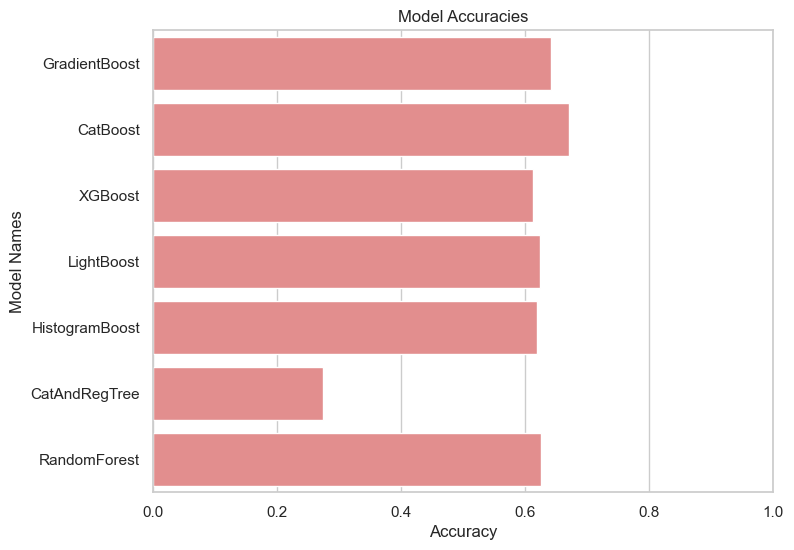

In [38]:
# Model Accuracies Bar Chart
data = pd.DataFrame({"Names": name, "Accuracies": accuracy})
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Accuracies", y="Names", data=data, color="lightcoral")
plt.xlim(0, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")
plt.show()

In [ ]:
# Feature Importances 
features = [
    'approval_index', 
    'budget_scaled', 
    'year_scaled', 
    'runtime_category_Medium', 
    'runtime_category_Long', 
    'pc1',  
    'pc2', 
    'pc3', 
    'pc4', 
    'pc5', 
]
importances = CB.feature_importances_
feature_indexes_by_importance = importances.argsort()
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(features[index], (importances[index] * 100.0)))
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(
    range(len(feature_indexes_by_importance)), 
    importances[feature_indexes_by_importance], 
    align='center', 
    color='lightcoral' 
)
plt.yticks(range(len(feature_indexes_by_importance)), [features[i] for i in feature_indexes_by_importance])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
# Hyperparameter Tuning alongside K-Fold Cross Validation
start = time()
speed = {}

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 1000, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 6, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 3.0),
        'border_count': trial.suggest_int('border_count', 200, 255),
        'subsample': trial.suggest_float('subsample', 0.7, 0.9),
        'random_strength': trial.suggest_int('random_strength', 1.0, 3.0),
    }

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold_maes = [] 
    # X_train = pd.DataFrame(X_train)
    # y_train = pd.Series(y_train)
    for train_idx, val_idx in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model = cb.CatBoostRegressor(random_state=42, silent=True, **params)
        model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), verbose=0)
        mae = mean_absolute_error(y_val_fold, model.predict(X_val_fold))
        fold_maes.append(mae)
    return np.mean(fold_maes)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
best_params = study.best_params
print("Best parameters:", best_params)

speed['CatBoosting'] = np.round(time()-start, 3)
print(f"Run time: {speed['CatBoosting']}s")

[I 2025-06-03 02:38:41,693] A new study created in memory with name: no-name-18f9152c-9f8c-4c17-b4bb-e4215f9d64e2
[I 2025-06-03 02:39:03,939] Trial 0 finished with value: 60770813.546211466 and parameters: {'iterations': 1479, 'learning_rate': 0.0791752363689169, 'depth': 10, 'l2_leaf_reg': 6.706170740469269, 'bagging_temperature': 0.5486617095682985, 'border_count': 211, 'subsample': 0.8404288695025813, 'random_strength': 2}. Best is trial 0 with value: 60770813.546211466.
[I 2025-06-03 02:39:07,022] Trial 1 finished with value: 60381686.75839065 and parameters: {'iterations': 1220, 'learning_rate': 0.09408893386329287, 'depth': 6, 'l2_leaf_reg': 2.9460374051596845, 'bagging_temperature': 1.2487150197150325, 'border_count': 228, 'subsample': 0.7124066586172948, 'random_strength': 2}. Best is trial 1 with value: 60381686.75839065.
[I 2025-06-03 02:39:21,446] Trial 2 finished with value: 61157153.56254463 and parameters: {'iterations': 1432, 'learning_rate': 0.09202966238185889, 'depth'

Best parameters: {'iterations': 1182, 'learning_rate': 0.03380600736754613, 'depth': 7, 'l2_leaf_reg': 9.888776029643482, 'bagging_temperature': 0.8443444077671453, 'border_count': 216, 'subsample': 0.8534380657189867, 'random_strength': 2}
Run time: 587.995s


# 6. Train the Model

In [43]:
model = cb.CatBoostRegressor(random_state=42, silent=True, **best_params)
model.fit(X_train, y_train)

# 7. Evaluate the Model

In [44]:
# Statistical Analysis
mae_train = mean_absolute_error(y_train, model.predict(X_train))
mae_test = mean_absolute_error(y_test, model.predict(X_test))

r_squared = r2_score(y_test, model.predict(X_test))
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

def adjusted_r_squared(y_true, y_pred, num_features):
    n = len(y_true)
    return 1 - ((1 - r_squared) * (n - 1) / (n - num_features - 1))

num_features = len(best_params)
adj_r_squared = adjusted_r_squared(y_test, model.predict(X_test), num_features)
train_adj_r_squared = adjusted_r_squared(y_train, model.predict(X_train), num_features)

print("MAE on training data:", mae_train)
print("MAE on testing data:", mae_test)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)
print("Adjusted R-squared FOR TRAIN:", train_adj_r_squared)

speed['CatBoost'] = np.round(time() - start, 3)
print(f"Run time: {speed['CatBoost']}s")

MAE on training data: 39393692.71801155
MAE on testing data: 56075745.94657703
Mean Squared Error: 1.041158401283114e+16
Root Mean Squared Error: 102037169.76098043
R-squared: 0.6787797175130817
Adjusted R-squared: 0.6768105510304033
Adjusted R-squared FOR TRAIN: 0.6779385514705628
Run time: 862.731s
